In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [28]:
df = pd.read_excel('/content/Pumpkin_Seeds_Dataset.xlsx')

In [29]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [52]:
features = df[['Area', 'Perimeter']].values

In [53]:
# Standarisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [54]:
# Menggunakan K-means clustering dengan 3 cluster
kmeans_seeds = KMeans(n_clusters=3, random_state=42)
kmeans_seeds.fit(features_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [55]:
# Memprediksi label cluster untuk setiap data point
labels_seeds = kmeans_seeds.predict(features_scaled)

In [56]:
# Mendapatkan pusat dari masing-masing cluster
centers_seeds = kmeans_seeds.cluster_centers_

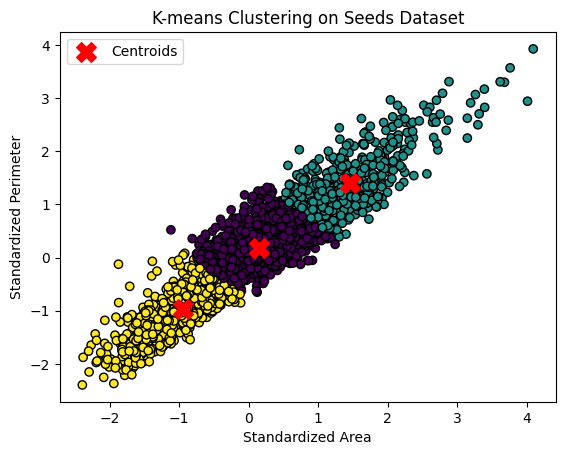

In [57]:
# Visualisasi hasil clustering
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=labels_seeds, cmap='viridis', edgecolors='k')
plt.scatter(centers_seeds[:, 0], centers_seeds[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering on Seeds Dataset')
plt.xlabel('Standardized Area')
plt.ylabel('Standardized Perimeter')
plt.legend()
plt.show()